In [24]:
# Vraag 1: Lees de dataset heart_ex.csv in, en noem de lijst ‘heart’

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score

heart = pd.read_csv("heart_ex.csv")

In [2]:
# Vraag 2: Toon de 10 eerste rijen van de dataset "heart"

heart[0:10]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,typical angina,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,typical angina,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,atypical angina,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,atypical angina,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,non-anginal pain,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,non-anginal pain,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Vraag 3: Wat voor soort (categorisch ordinaal – categorisch nominaal – numeriek discreet – numeriek continu) variabele is

print("exng: categorisch ordinaal")
print("chol: numeriek continu")

exng: categorisch ordinaal
chol: numeriek continu


In [4]:
# Vraag 4: Hoeveel types chest pain (cp) zijn er? 
#          Geef per type weer hoeveel keer het voorkomt (geen grafiek, enkel de cijfers).

heart['cp'].value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

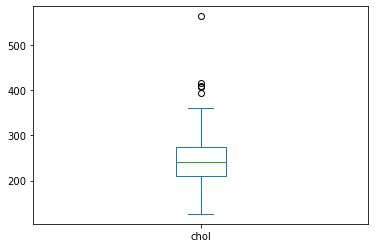

In [5]:
# Vraag 5: Maak een grafiek van de aantallen patiënten naar cholesterolwaarden? 
#          Bepaal zelf welk type grafiek hier het best voor in aanmerking komt.

x = heart.chol.plot(kind = 'box')

<AxesSubplot:title={'center':'Slope'}, ylabel='slp'>

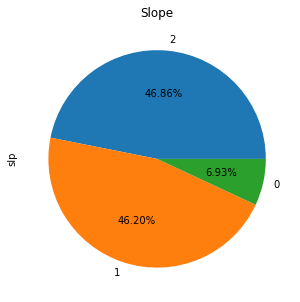

In [6]:
# Vraag 6: Maak een cirkeldiagram van de slope (slp).

heart['slp'].value_counts().plot.pie(title = "Slope", autopct = '%0.2f%%', figsize=(5,5))

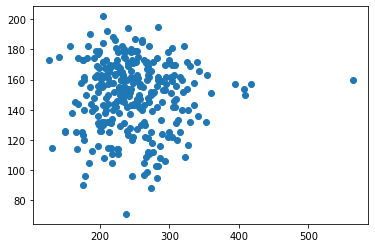

In [7]:
# Vraag 8: Ga na of er een verband is tussen de cholesterol-waarde (chol) 
#             en de hoogst bereikte waarde voor hartslag (thalachh).

plt.scatter(heart.chol, heart.thalachh)
plt.show()

In [8]:
# Vraag 9a: Welk aantal grote bloedvaten van het hart (caa) komt het meest voor bij vrouwen? 

heart_vrouwen = heart[heart.sex == 0]
print(heart_vrouwen.caa.value_counts())

0    64
1    15
2    13
3     4
Name: caa, dtype: int64


In [9]:
# Vraag 9b: Hoeveel procent van de vrouwen heeft dit?

print(heart_vrouwen.caa.value_counts().max() / heart_vrouwen.caa.value_counts().sum())

0.6666666666666666


In [10]:
# Vraag 11: Maak een nieuwe dataset heart_ML ('age', 'sex', 'trtbps','chol','restecg', 'exng')

heart_ML = pd.DataFrame(data = heart, columns = ['age', 'sex', 'trtbps','chol','restecg', 'exng'])
heart_ML['target'] = heart.output

In [11]:
# Vraag 12: Toon de laatste 5 rijen van dataset heart_ML

heart_ML.tail()

,age,sex,trtbps,chol,restecg,exng,target
298,57,0,140,241,1,1,0
299,45,1,110,264,1,0,0
300,68,1,144,193,1,0,0
301,57,1,130,131,1,1,0
302,57,0,130,236,0,0,0


In [12]:
# Vraag 13: Zet input (features) in X en output in y

X = heart[['age', 'trtbps', 'chol', 'sex', 'restecg', 'exng', 'caa', 'thall']]
y = heart_ML.target

In [13]:
# Vraag 14: Neem 75% als training data en 25% als testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Vraag 15: Pas één van de geziene ML algoritmes toe om y_pred te bepalen. 
# Zorg ervoor dat de voorspelling minstens 75% nauwkeurig is

In [16]:
#1)

model =  tree.DecisionTreeClassifier(random_state=0)
model =  model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.6973684210526315

In [17]:
#2)

classifier = BernoulliNB().fit(X_train, y_train)
y_predict_naive = classifier.predict(X_test)

metrics.accuracy_score(y_test, y_predict_naive)

0.7368421052631579

In [18]:
#3)

clf = LinearSVC().fit(X_train, y_train)
y_pred_lsvm = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred_lsvm)

C:\Users\ruben\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5263157894736842

In [19]:
#4)

logistic_model = LogisticRegression(penalty= 'l2', solver='liblinear').fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(acc)

0.75


In [20]:
# Vraag 16: Print de eerste 20 rijen van de voorspelde y-waarde (y_pred) en de werkelijke y-waarde

In [21]:
print(y_test[0:20])
print("-"*75)  # print a line
print(y_pred[0:20])

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
5      1
101    1
45     1
175    0
118    1
46     1
125    1
192    0
285    0
279    0
Name: target, dtype: int64
---------------------------------------------------------------------------
[0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0]


In [28]:
# Vraag 17: Hoe nauwkeurig is deze voorspelling?

print("Precision (Vorige Selectie) = ", precision_score(y_test[0:20], y_pred[0:20]) * 100, "%")
print("Precision (Algemeen) = ", precision_score(y_test, y_pred) * 100, "%")

Precision (Vorige Selectie) =  90.9090909090909 %
Precision (Algemeen) =  76.19047619047619 %
